# Multi-Variable Scaling

https://github.com/thachkse/Intro-to-ML/tree/main/HW_1

Kim Thach *800793249*

ECGR 5090 - C01


To simplify gathering answers please follow the links below or see navigation pane if viewing from PDF:

* [1A.](#first-bullet)
* [1B.](#sec-bullet)
* [2A.](#thir-bullet)
* [2B.](#fort-bullet)
* [3A.](#fif-bullet)
* [3B.](#six-bullet)


## Initiliazing Workspace and Functions

This section will identify libraries and define functions that will implemented throughout the code. The following functions to be used are:

`binary_map()` - defines `yes` as `1` and `no` as `2`

`compute_cost()` - is the linear regression training loop, which outputs the cost of your dataset.

`gradient_descent()` - iterates through all rows of your dataset and calculates your cost and new theta values in each iteration, for a specified number of iterations and learning rate.





In [1]:
import numpy as np
import pandas as pd

# Data Visualization

import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
# Binary mapping
# You can see that your dataset has many columns with values as 'Yes' or 'No'.
# But in order to fit a regression line, we would need numerical values and not string.
# List of variables to map
           
# Defining the map function
def binary_map(x):
 return x.map({'yes': 1, "no": 0})



In [3]:
# Regression / Training Loop

# Training Loop

def compute_cost(X,y,theta):
    
    """ 
    Compute cost for linear regression.

    Input Parameters
    ----------------
    X : 2D array where each row represent the training example and each column represent
        m= number of training examples
        n= number of features (including x0 column of ones)
    y: 1D array of labels/target value for each training example. Dimension (1 x m)

    theta :  1D array of fitting paramenters or weights. Dimension (1 x n)

    Output Parameters
    ----------------
    J: Scalar value.
    """
    m = len(y)
    predictions = X.dot(theta)
   # J = np.sum((predictions - y)**2)/(2*m)
   # prex = np.array(predictions,dtype=np.float64)
    errors = np.subtract(predictions,y)
    sqrErrors = np.square(errors)
    J = 1/(2*m)*np.sum(sqrErrors)
    return J


In [4]:
def gradient_descent(X,y,theta,alpha,iterations):

    cost_hist = np.zeros(iterations)
    m = len(y)
    for i in range(iterations):
        predictions = X.dot(theta)
        # prex = np.array(predictions,dtype=np.float64)
        errors = np.subtract(predictions, y)
        #errors = predictions - y
        #gradient = X.T.dot(errors) / m
        #theta = theta - alpha * gradient
        sum_delta = (alpha / m) * X.transpose().dot(errors)
        theta = theta - sum_delta
        cost_hist[i] = compute_cost(X,y,theta)

    return theta, cost_hist

In [5]:
def modelnplot(Xin,alpha,iterations):
    
    # Remove the price feature from the df in the training set (Independent variable)
    
    Yout = Xin.pop('price')
    
    # Dependent variables used in the training set.

    X = Xin
    m = len(Yout)
    
    # Create a vector of ones
    x0=np.ones((m,1))
    
    # Stack the 2 vectors side by side.
    XF=np.hstack((x0,X.values))
    
    # Set the number of parameters in your model
    
    xcols = XF.shape[1]
    theta=np.zeros(xcols)
    
    
    cost = compute_cost(XF,Yout,theta)
    print('The cost for given values of all parameters ', cost)
    
    theta=np.zeros(xcols)
    thetafinal, cost_hist = gradient_descent(XF,Yout,theta,alpha,iterations)
    print('Final value of theta =', thetafinal)
    
    plt.figure()
    plt.plot(range(1,iterations+1),cost_hist,color='blue')
    plt.rcParams["figure.figsize"] = (10,6)
    plt.grid()
    plt.xlabel('Number of iterations')
    plt.ylabel('Cost (J)')
    plt.title('Convergence of gradient descent')

    return XF, Yout, thetafinal, cost, cost_hist 

## Data

This study will create use real estate data to generate a model for the housing market, using several features of the dataset. This study will also explore the various configurations a model can be created by scaling / not-scaling features and properly splitting training and validations sets from the data. This specific section on data demonstrate how to import data, clean & prep data and as well, as how to split data.

In [6]:
# Import data

housing = pd.DataFrame(pd.read_csv("Housing.csv"))
housing.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [7]:
# Identify some of the Data's parameters

print('The # of samples of homes in this dataset is ' + str(housing.shape[0]))
print('The # of features available in this dataset is ' + str(housing.shape[1]))


The # of samples of homes in this dataset is 545
The # of features available in this dataset is 13


In [8]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [9]:
# Identify some general statistical information about the dataset

housing.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


### Clean and Prep Data

Initially we could manually identify the features which used a binary answer format like a `yes` & `no` and plug those strings into to the function `binary_map()`. In place of that, we identified the `dtypes` of the dataset and grouped them. All `objects` seemed to contain a `yes` or `no` response format, except a feature idenitified as an object in the last column. So we just removed that from the list of strings. There's probably more elaborate approaches. 

In [10]:

g = housing.columns.to_series().groupby(housing.dtypes).groups
print(g)

{int64: ['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'parking'], object: ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea', 'furnishingstatus']}


In [11]:
colvar = housing.select_dtypes(include=['object'])
colvar

,mainroad,guestroom,basement,hotwaterheating,airconditioning,prefarea,furnishingstatus
0,yes,no,no,no,yes,yes,furnished
1,yes,no,no,no,yes,no,furnished
2,yes,no,yes,no,no,yes,semi-furnished
3,yes,no,yes,no,yes,yes,furnished
4,yes,yes,yes,no,yes,no,furnished
...,...,...,...,...,...,...,...
540,yes,no,yes,no,no,no,unfurnished
541,no,no,no,no,no,no,semi-furnished
542,yes,no,no,no,no,no,unfurnished
543,no,no,no,no,no,no,furnished


In [12]:
listx = list(colvar.columns)
print(listx)
varlist = listx[:-1]
print(varlist)

['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea', 'furnishingstatus']
['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea']


In [13]:
# Apply binary_map here

housing[varlist] = housing[varlist].apply(binary_map)
housing.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,furnished
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,furnished
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,semi-furnished
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,furnished
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,furnished


### Training & Test Sets

In [14]:
# Splitting the Data into Training and Testing Sets

from sklearn.model_selection import train_test_split

# We specify this so that the train and test data set always have the 

np.random.seed(0)
df_train, df_test = train_test_split(housing, train_size = 0.7, test_size = 0.3, random_state = 42)

df_train.shape

(381, 13)

In [15]:
df_test.shape

(164, 13)

## Problem 1

#### 1A

In [30]:
# Problem 1A

# Create a model from the housing data using only the features identified in the the var num_vars

num_vars = ['area','bedrooms','bathrooms','stories','parking','price']

# Create a train1 and test 1 df containing only the features listed above.
train1 = df_train[num_vars] # Training set
test1 = df_test[num_vars]   # Test Set

# Verify the new df's contain only the features described in num_vars
train1.head()

,area,bedrooms,bathrooms,stories,parking,price
126,7160,3,1,1,2,5880000
363,3584,2,1,1,0,3710000
370,4280,2,1,1,2,3640000
31,7000,3,1,4,2,8400000
113,9620,3,1,1,2,6083000


The cost for given values of all parameters  12911039312475.197
Final value of theta = [-1.16984631e+54 -7.07801301e+57 -3.51669366e+54 -1.52185498e+54
 -2.11438639e+54 -9.16695431e+53]


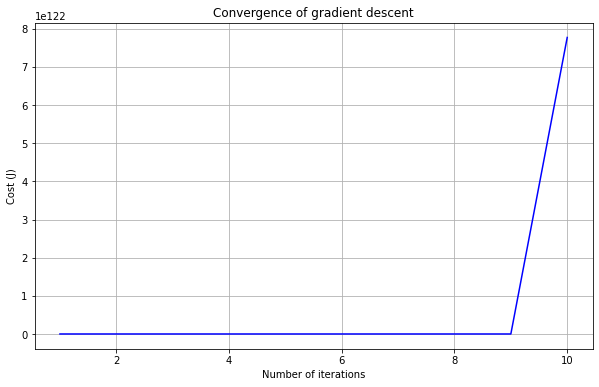

In [31]:
XTrain1, YTrain1, thetafinal, cost, cost_hist = modelnplot(train1,0.01,10)

In [32]:
# Remove the price feature from the df in the training set (Independent variable)
Y = train1.pop('price') # overwriting vars Y and X seemed easier for copy, paste at the time. (Could create a function...maybe later)
# Store to be used later
Y1=Y
# Dependent variables used in the training set.
X = train1


KeyError: 'price'

In [22]:

m1 = len(X)
print(m1)
print(X)

381
     area  bedrooms  bathrooms  stories  parking
126  7160         3          1        1        2
363  3584         2          1        1        0
370  4280         2          1        1        2
31   7000         3          1        4        2
113  9620         3          1        1        2
..    ...       ...        ...      ...      ...
71   6000         4          2        4        0
106  5450         4          2        1        0
270  4500         3          2        3        1
435  4040         2          1        1        0
102  5500         3          2        4        1

[381 rows x 5 columns]


<Figure size 720x432 with 0 Axes>

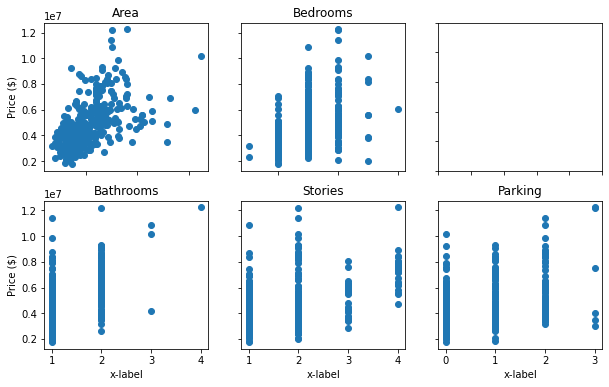

In [23]:
# Subplots of everything
plt.figure()
fig, axs = plt.subplots(2, 3)
axs[0, 0].scatter(X.values[:,0], Y)
axs[0, 0].set_title('Area')
axs[0, 1].scatter(X.values[:,1], Y)
axs[0, 1].set_title('Bedrooms')
axs[1, 0].scatter(X.values[:,2], Y )
axs[1, 0].set_title('Bathrooms')
axs[1, 1].scatter(X.values[:,3], Y)
axs[1, 1].set_title('Stories')
axs[1, 2].scatter(X.values[:,4], Y)
axs[1, 2].set_title('Parking')


for ax in axs.flat:
    ax.set(xlabel='x-label', ylabel='Price ($)')

# Hide x labels and tick labels for top plots and y ticks for right plots.
for ax in axs.flat:
    ax.label_outer()

In [24]:
# Create a vector of ones

x0=np.ones((m1,1))

# Stack the 2 vectors side by side.

XF=np.hstack((x0,X.values))

In [25]:
print(XF)
# Set the number of parameters in your model
print(XF.shape)
xcols = XF.shape[1]
print(xcols)
theta=np.zeros(xcols)
print(theta)

[[1.000e+00 7.160e+03 3.000e+00 1.000e+00 1.000e+00 2.000e+00]
 [1.000e+00 3.584e+03 2.000e+00 1.000e+00 1.000e+00 0.000e+00]
 [1.000e+00 4.280e+03 2.000e+00 1.000e+00 1.000e+00 2.000e+00]
 ...
 [1.000e+00 4.500e+03 3.000e+00 2.000e+00 3.000e+00 1.000e+00]
 [1.000e+00 4.040e+03 2.000e+00 1.000e+00 1.000e+00 0.000e+00]
 [1.000e+00 5.500e+03 3.000e+00 2.000e+00 4.000e+00 1.000e+00]]
(381, 6)
6
[0. 0. 0. 0. 0. 0.]


In [26]:
cost = compute_cost(XF,Y,theta)
print('The cost for given values of all parameters ', cost)

The cost for given values of all parameters  12911039312475.197


The cost is a significantly large number, not sure how to interpret this quite yet.

In [27]:
theta=np.zeros(xcols)
iterations = 200
alpha = 0.1

theta, cost_hist = gradient_descent(XF,Y,theta,alpha,iterations)
print('Final value of theta =', theta)

Final value of theta = [nan nan nan nan nan nan]


/opt/anaconda3/lib/python3.8/site-packages/pandas/core/arraylike.py:358: RuntimeWarning: overflow encountered in square
  result = getattr(ufunc, method)(*inputs, **kwargs)
<ipython-input-4-005b0a8e3ca6>:13: RuntimeWarning: invalid value encountered in subtract
  theta = theta - sum_delta


Typical values used in the previous HW Example did not work in this example. There is a large variation between the values of our features in the dataset. The area feature is *significantly* larger than the other features which typically included binary responses `1` or `0`. This may have caused the major errors in the calculation, providing a significantly small values overall, which could not be computed?

In [28]:
theta=np.zeros(xcols)
iterations = 10
alpha = 0.0000001
alpha2 = 0.01

theta, cost_hist = gradient_descent(XF,Y,theta,alpha,iterations)
thetax, cost_histx = gradient_descent(XF,Y,theta,alpha2,iterations)

print('Final value of theta w/ alpha =', theta)
print('Final value of theta w/ alpha2 =', thetax)


Final value of theta w/ alpha = [-2.38615719e+02 -1.44598115e+06 -7.17029267e+02 -3.10155516e+02
 -4.30785449e+02 -1.86962019e+02]
Final value of theta w/ alpha2 = [-1.97820297e+57 -1.19688768e+61 -5.94670754e+57 -2.57344749e+57
 -3.57541449e+57 -1.55012638e+57]


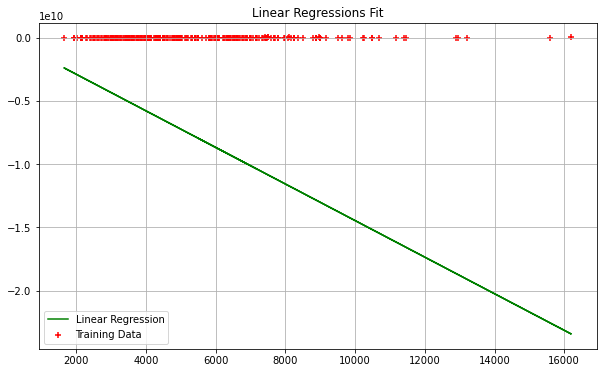

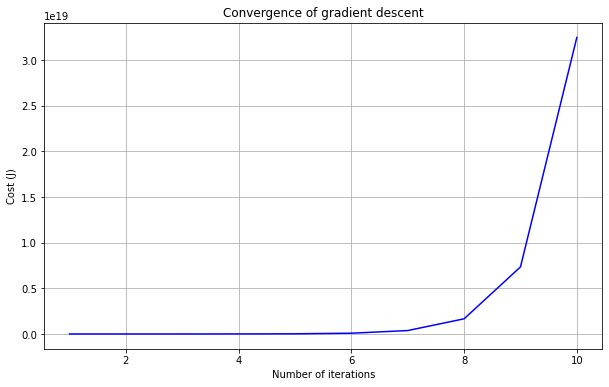

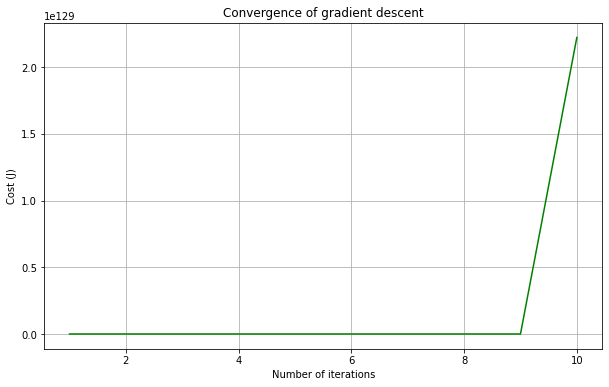

In [29]:
plt.figure()
plt.scatter(XF[:,1],Y,color='red',marker='+',label='Training Data')
plt.plot(XF[:,1],XF.dot(theta),color='green',label='Linear Regression')

plt.rcParams['figure.figsize'] = (10,6)
plt.grid()
plt.title('Linear Regressions Fit')
plt.legend()

plt.figure()
plt.plot(range(1,iterations+1),cost_hist,color='blue')
plt.rcParams["figure.figsize"] = (10,6)
plt.grid()
plt.xlabel('Number of iterations')
plt.ylabel('Cost (J)')
plt.title('Convergence of gradient descent')

plt.figure()
plt.plot(range(1,iterations+1),cost_histx,color='green')
plt.rcParams["figure.figsize"] = (10,6)
plt.grid()
plt.xlabel('Number of iterations')
plt.ylabel('Cost (J)')
plt.title('Convergence of gradient descent')


theta1 = theta

The blue plotted line shows the really small alpha with the same number of iterations. It takes longer to converge and the overall cost is lower. The alpha specified as a 0.01 converged faster and has a higher cost relative to the blue plotted line. The section below will look into the validation set. The steps below follow the same steps as above, with some differently named variables.

In [ ]:
test1 = df_test[num_vars]
Y = test1.pop('price')
X = test1
# Subplots of everything
plt.figure()
fig, axs = plt.subplots(2, 3)
axs[0, 0].scatter(X.values[:,0], Y)
axs[0, 0].set_title('Area')
axs[0, 1].scatter(X.values[:,1], Y)
axs[0, 1].set_title('Bedrooms')
axs[1, 0].scatter(X.values[:,2], Y )
axs[1, 0].set_title('Bathrooms')
axs[1, 1].scatter(X.values[:,3], Y)
axs[1, 1].set_title('Stories')
axs[1, 2].scatter(X.values[:,4], Y)
axs[1, 2].set_title('Parking')


for ax in axs.flat:
    ax.set(xlabel='x-label', ylabel='Price ($)')

# Hide x labels and tick labels for top plots and y ticks for right plots.
for ax in axs.flat:
    ax.label_outer()
    
    


In [ ]:
m = len(Y)
Y2= Y
# Create a vector of ones

x0=np.ones((m,1))

# Stack the 2 vectors side by side.

Xtst=np.hstack((x0,X.values))


# Set the number of parameters in your model
print(Xtst.shape)
xcols = Xtst.shape[1]
print(xcols)
theta=np.zeros(xcols)
print(theta)

cost2 = compute_cost(Xtst,Y,theta)
print('The cost for given values of all parameters ', cost2)

theta=np.zeros(xcols)
iterations = 10
alpha = 0.0000001

theta2, cost_hist2 = gradient_descent(Xtst,Y2,theta,alpha,iterations)
print('Final value of theta =', theta2)

plt.figure()
plt.scatter(Xtst[:,1],Y,color='red',marker='+',label='Training Data')
plt.scatter(Xtst[:,2],Y,color='blue',marker='+',label='Training Data')
plt.scatter(Xtst[:,3],Y,color='green',marker='+',label='Training Data')
plt.plot(Xtst[:,1],Xtst.dot(theta1),color='green',label='Linear Regression')

plt.rcParams['figure.figsize'] = (10,6)
plt.grid()
plt.title('Linear Regressions Fit')
plt.legend()

plt.figure()
plt.plot(range(1,iterations+1),cost_hist2,color='blue')
plt.rcParams["figure.figsize"] = (10,6)
plt.grid()
plt.xlabel('Number of iterations')
plt.ylabel('Cost (J)')
plt.title('Convergence of gradient descent')

In [ ]:
#### Test & Validation Comparison

plt.figure()
plt.plot(XF[:,1],XF.dot(theta1),color='blue',label='Training')
plt.plot(Xtst[:,1],Xtst.dot(theta2),color='green',label='Validation')
plt.rcParams["figure.figsize"] = (10,6)
plt.grid()
plt.title('Linear Regression Models relative to parameter 1')
plt.legend()


plt.figure()
plt.plot(range(1,iterations+1),cost_hist,color='blue',label='Training Loss')
plt.plot(range(1,iterations+1),cost_hist2,color='green',label='Validation Loss')
plt.legend()
plt.rcParams["figure.figsize"] = (10,6)
plt.grid()
plt.xlabel('Number of iterations')
plt.ylabel('Cost (J)')
plt.title('Convergence of gradient descent')

plt.figure()
plt.scatter(XF[:,1],Y1,color='red',marker='+',label='Area Training Data')
plt.scatter(Xtst[:,1],Y2,color='blue',marker='+',label='Area Validation Data')
plt.xlabel('Area (sqft.)')
plt.ylabel('Price ($)')
plt.title('Area Data')
plt.legend()

plt.figure()
plt.figure()
plt.scatter(XF[:,1],Y1,color='red',marker='+',label='Area Training Data')
plt.scatter(Xtst[:,1],Y2,color='blue',marker='+',label='Area Validation Data')
plt.plot(XF[:,1],XF.dot(theta1),color='blue',label='Training Regression')
plt.plot(Xtst[:,1],Xtst.dot(theta2),color='green',label='Validation Regression')
plt.xlabel('Area (sqft.)')
plt.ylabel('Price ($)')
plt.title('Area Data')
plt.legend()

##### 1A Observations <a class="anchor" id="first-bullet"></a> 

Analyzing the plots above, using the same iterations and learning rate of 10 and 0.01, respectively showed there is a differences from the training and validation set. The validation set showed greater loss than the training set but they roughly converged at the same time. The differences are somewhat large, but the profile of the regressions / slopes are mostly similar. 

#### 1B

Just include some addtional features as described below:

Area, bedrooms, bathrooms, stories, mainroad, guestroom, basement, hotwaterheating, airconditioning, parking, prefarea

In [ ]:
num_vars = ['area','bedrooms','bathrooms','stories','mainroad','guestroom','basement','hotwaterheating','airconditioning','parking','prefarea','price']

# Create a train1 and test 1 df containing only the features listed above.
train2 = df_train[num_vars] # Training set
test2 = df_test[num_vars]   # Test Set

# Verify the new df's contain only the features described in num_vars
train2.head()

# Remove the price feature from the df in the training set (Independent variable)
Y = train2.pop('price') # overwriting vars Y and X seemed easier for copy, paste at the time. (Could create a function...maybe later)
# Store to be used later
Y3=Y
# Dependent variables used in the training set.
X = train2
m1 = len(X)

# Subplots of everything
plt.figure()
fig, axs = plt.subplots(2, 3)
axs[0, 0].scatter(X.values[:,0], Y)
axs[0, 0].set_title('Area')
axs[0, 1].scatter(X.values[:,1], Y)
axs[0, 1].set_title('Bedrooms')
axs[1, 0].scatter(X.values[:,2], Y )
axs[1, 0].set_title('Bathrooms')
axs[1, 1].scatter(X.values[:,3], Y)
axs[1, 1].set_title('Stories')
axs[1, 2].scatter(X.values[:,4], Y)
axs[1, 2].set_title('Parking')


for ax in axs.flat:
    ax.set(xlabel='x-label', ylabel='Price ($)')

# Hide x labels and tick labels for top plots and y ticks for right plots.
for ax in axs.flat:
    ax.label_outer()

In [ ]:
# Create a vector of ones

x0=np.ones((m1,1))

# Stack the 2 vectors side by side.

XF2=np.hstack((x0,X.values))
# Set the number of parameters in your model
xcols = XF2.shape[1]
theta=np.zeros(xcols)
print(theta)

cost = compute_cost(XF2,Y3,theta)
print('The cost for given values of all parameters ', cost)

theta=np.zeros(xcols)
iterations = 10
alpha = 0.0000001
alpha2 = 0.01

theta3, cost_hist3 = gradient_descent(XF2,Y3,theta,alpha,iterations)
thetax3, cost_histx3 = gradient_descent(XF2,Y3,theta,alpha2,iterations)

print('Final value of theta w/ alpha =', theta3)
print('Final value of theta w/ alpha2 =', thetax3)


plt.figure()
plt.scatter(XF2[:,1],Y3,color='red',marker='+',label='Training Data')
plt.plot(XF2[:,1],XF2.dot(theta3),color='green',label='Linear Regression')

plt.rcParams['figure.figsize'] = (10,6)
plt.grid()
plt.title('Linear Regressions Fit')
plt.legend()

plt.figure()
plt.plot(range(1,iterations+1),cost_hist3,color='blue')
plt.rcParams["figure.figsize"] = (10,6)
plt.grid()
plt.xlabel('Number of iterations')
plt.ylabel('Cost (J)')
plt.title('Convergence of gradient descent')

plt.figure()
plt.plot(range(1,iterations+1),cost_histx3,color='green')
plt.rcParams["figure.figsize"] = (10,6)
plt.grid()
plt.xlabel('Number of iterations')
plt.ylabel('Cost (J)')
plt.title('Convergence of gradient descent')

In [ ]:
test2 = df_test[num_vars]
Y = test2.pop('price')
X = test2
# Subplots of everything
plt.figure()
fig, axs = plt.subplots(2, 3)
axs[0, 0].scatter(X.values[:,0], Y)
axs[0, 0].set_title('Area')
axs[0, 1].scatter(X.values[:,1], Y)
axs[0, 1].set_title('Bedrooms')
axs[1, 0].scatter(X.values[:,2], Y )
axs[1, 0].set_title('Bathrooms')
axs[1, 1].scatter(X.values[:,3], Y)
axs[1, 1].set_title('Stories')
axs[1, 2].scatter(X.values[:,4], Y)
axs[1, 2].set_title('Parking')


for ax in axs.flat:
    ax.set(xlabel='x-label', ylabel='Price ($)')

# Hide x labels and tick labels for top plots and y ticks for right plots.
for ax in axs.flat:
    ax.label_outer()
    
m = len(Y)
Y4= Y
# Create a vector of ones

x0=np.ones((m,1))

# Stack the 2 vectors side by side.

Xtst2=np.hstack((x0,X.values))


# Set the number of parameters in your model
print(Xtst2.shape)
xcols = Xtst2.shape[1]
print(xcols)
theta=np.zeros(xcols)
print(theta)

cost2 = compute_cost(Xtst2,Y4,theta)
print('The cost for given values of all parameters ', cost2)

theta=np.zeros(xcols)
iterations = 10
alpha = 0.0000001

theta4, cost_hist4 = gradient_descent(Xtst2,Y4,theta,alpha,iterations)
print('Final value of theta =', theta4)

plt.figure()
plt.scatter(Xtst2[:,1],Y4,color='red',marker='+',label='Training Data')
plt.scatter(Xtst2[:,2],Y4,color='blue',marker='+',label='Training Data')
plt.scatter(Xtst2[:,3],Y4,color='green',marker='+',label='Training Data')
plt.plot(Xtst2[:,1],Xtst2.dot(theta4),color='green',label='Linear Regression')

plt.rcParams['figure.figsize'] = (10,6)
plt.grid()
plt.title('Linear Regressions Fit')
plt.legend()

plt.figure()
plt.plot(range(1,iterations+1),cost_hist4,color='blue')
plt.rcParams["figure.figsize"] = (10,6)
plt.grid()
plt.xlabel('Number of iterations')
plt.ylabel('Cost (J)')
plt.title('Convergence of gradient descent')

#### Test & Validation Comparison

plt.figure()
plt.plot(XF2[:,1],XF2.dot(theta3),color='blue',label='Training')
plt.plot(Xtst2[:,1],Xtst2.dot(theta4),color='green',label='Validation')
plt.rcParams["figure.figsize"] = (10,6)
plt.grid()
plt.title('Linear Regression Models relative to parameter 1')
plt.legend()


plt.figure()
plt.plot(range(1,iterations+1),cost_hist3,color='blue',label='Training Loss')
plt.plot(range(1,iterations+1),cost_hist4,color='green',label='Validation Loss')
plt.legend()
plt.rcParams["figure.figsize"] = (10,6)
plt.grid()
plt.xlabel('Number of iterations')
plt.ylabel('Cost (J)')
plt.title('Convergence of gradient descent')

plt.figure()
plt.scatter(XF2[:,1],Y3,color='red',marker='+',label='Area Training Data')
plt.scatter(Xtst2[:,1],Y4,color='blue',marker='+',label='Area Validation Data')
plt.xlabel('Area (sqft.)')
plt.ylabel('Price ($)')
plt.title('Area Data')
plt.legend()

plt.figure()
plt.figure()
plt.scatter(XF2[:,1],Y3,color='red',marker='+',label='Area Training Data')
plt.scatter(Xtst2[:,1],Y4,color='blue',marker='+',label='Area Validation Data')
plt.plot(XF2[:,1],XF2.dot(theta3),color='blue',label='Training Regression')
plt.plot(Xtst2[:,1],Xtst2.dot(theta4),color='green',label='Validation Regression')
plt.xlabel('Area (sqft.)')
plt.ylabel('Price ($)')
plt.title('Area Data')
plt.legend()

In [ ]:
plt.figure()
plt.plot(XF[:,1],XF.dot(theta1),color='orange',label='Training 6 Features')
plt.plot(Xtst[:,1],Xtst.dot(theta1),color='purple',label='Validation 6 Features')
plt.plot(XF2[:,1],XF2.dot(theta3),color='blue',label='Training 12 Features')
plt.plot(Xtst2[:,1],Xtst2.dot(theta4),color='green',label='Validation 12 Features')
plt.rcParams["figure.figsize"] = (10,6)
plt.grid()
plt.title('Linear Regression Models relative to parameter 1')
plt.legend()

##### 1B Observations <a class="anchor" id="sec-bullet"></a> 

Eventhough there were more features used in the validation and training set, it did not change the overall outcome for the best learning rate and iteration (or more trial and error testing will be needed). There was a difficulty seeing change in the loss and regression models between training 6 and 12 features because of the large inbalance of values related to the price and several other features. I think we will be able to resolve this later using scaling. 

## Problem 2

In [ ]:
num_vars = ['area','bedrooms','bathrooms','stories','parking','price']

df_newtrain = df_train[num_vars]
df_newtest = df_test[num_vars]
df_newtrain.head()

In [ ]:
df_newtrain.shape
df_newtrainx = df_newtrain

In [ ]:
import warnings
warnings.filterwarnings('ignore')

from sklearn.preprocessing import MinMaxScaler, StandardScaler

# define standard scaler
# scaler = StandardScaler()

scaler = MinMaxScaler()
df_newtrain[num_vars] = scaler.fit_transform(df_newtrain[num_vars])
df_newtrain.head(3)

In [ ]:
import warnings
warnings.filterwarnings('ignore')

from sklearn.preprocessing import MinMaxScaler, StandardScaler

# define standard scaler
scaler = StandardScaler()

# scaler = MinMaxScaler()

df_newtrainx[num_vars] = scaler.fit_transform(df_newtrainx[num_vars])
df_newtrainx.head(3)

In [ ]:
y_newtrain = df_newtrain.pop('price')
x_newtrain = df_newtrain


In [ ]:
x_newtrain.head()

In [ ]:
y_newtrain.head()

In [ ]:
Y = y_newtrain.values

In [ ]:
plt.figure()
plt.plot(df_train.values[:,0],df_train['price'])
plt.xlabel('Area (sqft.)')
plt.ylabel('Price ($)')

In [ ]:
x_newtrain.head()
num_vars
xlen = len(num_vars) -1
print(xlen)

In [ ]:
print(x_newtrain.values)
m = len(x_newtrain.values)
print(m)

# Stack the 2 vectors side by side.
x0 = np.ones((m,1))

Xin=np.hstack((x0,x_newtrain.values))
print(Xin)

# Set the number of parameters in your model

theta=np.zeros(xlen+1)


In [ ]:
cost = compute_cost(Xin,Y,theta)
print('The cost for the given values of all parameters = ', cost)


In [ ]:
# Start Computations

# Initialize a few values
theta=np.zeros(xlen+1)
iterations = 250
alpha = 0.01

theta, cost_hist = gradient_descent(Xin,Y,theta,alpha,iterations)

print('Final value of theta = ', theta)


# Plot loss over iterations
plt.figure()
plt.plot(range(1,iterations+1),cost_hist,color='blue')
plt.rcParams["figure.figsize"] = (10,6)
plt.grid()
plt.xlabel('Number of iterations')
plt.ylabel('Cost (J)')
plt.title('Convergence of gradient descent')

In [ ]:
y_newtrain = df_newtrainx.pop('price')
x_newtrain = df_newtrainx
x_newtrain.head()

num_vars
xlen = len(num_vars) -1
print(xlen)

print(x_newtrain.values)
m = len(x_newtrain.values)
print(m)

# Stack the 2 vectors side by side.
x0 = np.ones((m,1))

Xin=np.hstack((x0,x_newtrain.values))


# Set the number of parameters in your model

theta=np.zeros(xlen+1)

cost = compute_cost(Xin,Y,theta)
print('The cost for the given values of all parameters = ', cost)

# Start Computations

# Initialize a few values
theta=np.zeros(xlen+1)
iterations = 250
alpha = 0.01

theta, cost_hist = gradient_descent(Xin,Y,theta,alpha,iterations)

print('Final value of theta = ', theta)


# Plot loss over iterations
plt.figure()
plt.plot(range(1,iterations+1),cost_hist,color='blue')
plt.rcParams["figure.figsize"] = (10,6)
plt.grid()
plt.xlabel('Number of iterations')
plt.ylabel('Cost (J)')
plt.title('Convergence of gradient descent')